In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv("audio_analysis_results.csv")

In [3]:
df

,file_id,transcription,duration
0,1006-135212-0000,COMING AS IT DID AT A PERIOD OF EXCEPTIONAL DU...,15.185000
1,1006-135212-0001,INTEREST DROOPED HOWEVER WHEN AFTER WEEKS OF F...,12.114937
2,1006-135212-0002,IT WOULD BE AS WELL PERHAPS THAT I SHOULD REFR...,14.490000
3,1006-135212-0003,IN THE YEAR ALREADY MENTIONED A TRAIN LEFT EUS...,15.915000
4,1006-135212-0004,THE TRAIN HOWEVER IS A FAVOURITE ONE AMONG MAN...,12.959938
...,...,...,...
148683,985-126228-0047,AND GRIEVING FOR THE SUFFERER AGAIN AND AGAIN ...,15.145000
148684,985-126228-0048,AND THE SUSPENSE WAS OVER JUDE FELT RELIEVED T...,14.510000
148685,985-126228-0049,THAT SUE HAD ACTED WITH SUCH UNUSUAL FOOLISHNE...,10.220000
148686,985-126228-0050,PERHAPS SUE WAS THUS VENTURESOME WITH MEN BECA...,8.395000


In [15]:
# Check for missing values
missing_values = df.isnull().sum()
print("missing values\n",missing_values)

# Check for duplicate entries
duplicate_entries = df.duplicated().sum()
print("\nduplicate_entries",duplicate_entries)

# Validate uniqueness of file identifiers
unique_file_ids = df['file_id'].nunique()
total_entries = df.shape[0]

print("\nuniqueness",unique_file_ids,total_entries)

missing values
 file_id          0
transcription    0
duration         0
dtype: int64

duplicate_entries 0

uniqueness 148688 148688


In [17]:
# Calculate the length of each transcription
df['transcription_length'] = df['transcription'].apply(len)

# Basic statistics for the transcription length column
transcription_length_stats = df['transcription_length'].describe()

df

,file_id,transcription,duration,transcription_length
0,1006-135212-0000,COMING AS IT DID AT A PERIOD OF EXCEPTIONAL DU...,15.185000,239
1,1006-135212-0001,INTEREST DROOPED HOWEVER WHEN AFTER WEEKS OF F...,12.114937,174
2,1006-135212-0002,IT WOULD BE AS WELL PERHAPS THAT I SHOULD REFR...,14.490000,221
3,1006-135212-0003,IN THE YEAR ALREADY MENTIONED A TRAIN LEFT EUS...,15.915000,238
4,1006-135212-0004,THE TRAIN HOWEVER IS A FAVOURITE ONE AMONG MAN...,12.959938,190
...,...,...,...,...
148683,985-126228-0047,AND GRIEVING FOR THE SUFFERER AGAIN AND AGAIN ...,15.145000,241
148684,985-126228-0048,AND THE SUSPENSE WAS OVER JUDE FELT RELIEVED T...,14.510000,235
148685,985-126228-0049,THAT SUE HAD ACTED WITH SUCH UNUSUAL FOOLISHNE...,10.220000,172
148686,985-126228-0050,PERHAPS SUE WAS THUS VENTURESOME WITH MEN BECA...,8.395000,147


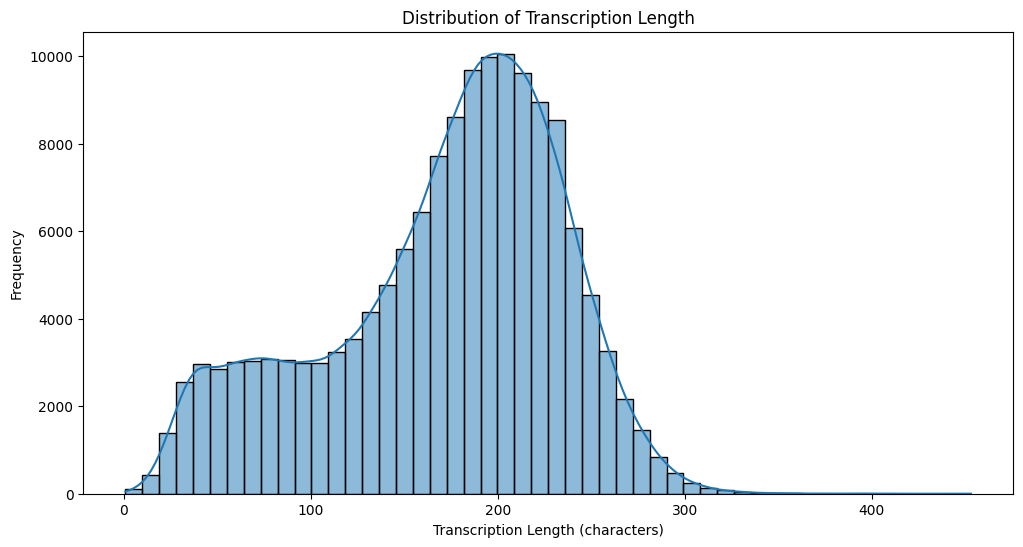

In [19]:
# Plot the distribution of the transcription length column
plt.figure(figsize=(12, 6))
sns.histplot(df['transcription_length'], bins=50, kde=True)
plt.title('Distribution of Transcription Length')
plt.xlabel('Transcription Length (characters)')
plt.ylabel('Frequency')
plt.show()

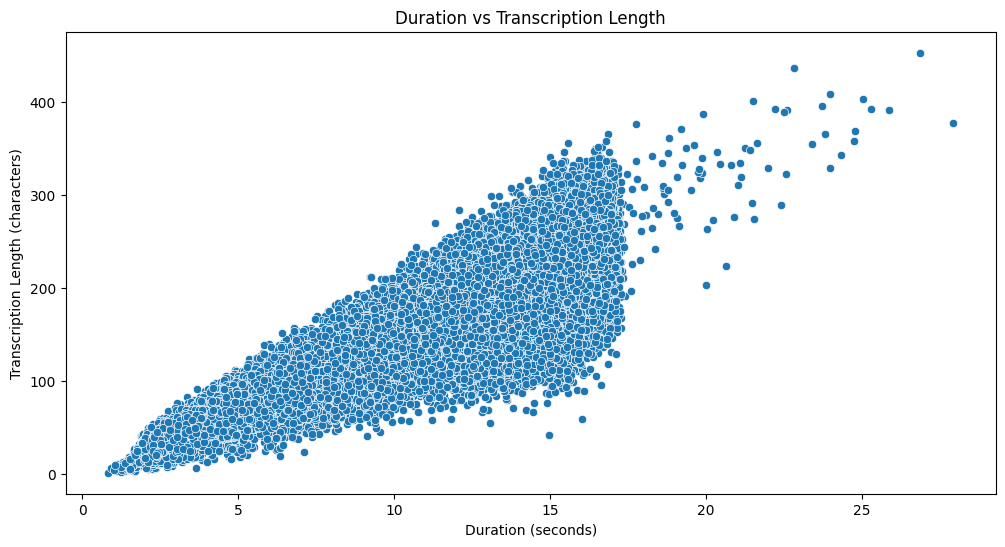

In [20]:
# Scatter plot to explore the relationship between duration and transcription length
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration', y='transcription_length', data=df)
plt.title('Duration vs Transcription Length')
plt.xlabel('Duration (seconds)')
plt.ylabel('Transcription Length (characters)')
plt.show()


In [22]:

# Initialize the scaler
scaler = StandardScaler()

# Scale the duration column
df['duration_scaled'] = scaler.fit_transform(df[['duration']])
print(df)

                 file_id                                      transcription  \
0       1006-135212-0000  COMING AS IT DID AT A PERIOD OF EXCEPTIONAL DU...   
1       1006-135212-0001  INTEREST DROOPED HOWEVER WHEN AFTER WEEKS OF F...   
2       1006-135212-0002  IT WOULD BE AS WELL PERHAPS THAT I SHOULD REFR...   
3       1006-135212-0003  IN THE YEAR ALREADY MENTIONED A TRAIN LEFT EUS...   
4       1006-135212-0004  THE TRAIN HOWEVER IS A FAVOURITE ONE AMONG MAN...   
...                  ...                                                ...   
148683   985-126228-0047  AND GRIEVING FOR THE SUFFERER AGAIN AND AGAIN ...   
148684   985-126228-0048  AND THE SUSPENSE WAS OVER JUDE FELT RELIEVED T...   
148685   985-126228-0049  THAT SUE HAD ACTED WITH SUCH UNUSUAL FOOLISHNE...   
148686   985-126228-0050  PERHAPS SUE WAS THUS VENTURESOME WITH MEN BECA...   
148687   985-126228-0051  JUDE AND THE LANDLADY OFFERED TO GET IT NO SHE...   

         duration  transcription_length  duration_s

In [23]:
# Cleaning Audio

In [ ]:
from pydub import AudioSegment, effects
import librosa
import noisereduce as nr
import os

# Function to load and clean an audio file
def clean_audio(file_path, output_path, target_sr=16000):
    # Load audio file
    audio = AudioSegment.from_file(file_path)
    
    # Normalize volume
    normalized_audio = effects.normalize(audio)
    
    # Trim silence
    trimmed_audio = normalized_audio.strip_silence(silence_thresh=normalized_audio.dBFS-16)
    
    # Export to temporary WAV file for further processing
    temp_file = "temp.wav"
    trimmed_audio.export(temp_file, format="wav")
    
    # Load the trimmed audio with librosa for noise reduction and resampling
    y, sr = librosa.load(temp_file, sr=None)
    
    # Perform noise reduction
    reduced_noise = nr.reduce_noise(y=y, sr=sr)
    
    # Resample audio to target sampling rate
    resampled_audio = librosa.resample(reduced_noise, orig_sr=sr, target_sr=target_sr)
    
    # Save the cleaned and resampled audio file
    librosa.output.write_wav(output_path, resampled_audio, target_sr)
    
    # Remove temporary file
    os.remove(temp_file)


# Define input and output directories
input_base_dir = 'audios'
output_base_dir = 'cleaned_audios'

# Create the output base directory if it doesn't exist
os.makedirs(output_base_dir, exist_ok=True)

# Iterate through the nested directories
for i in range(1, 11):
    for j in range(1, 51):
        input_dir = os.path.join(input_base_dir, str(i), str(j))
        output_dir = os.path.join(output_base_dir, str(i), str(j))
        
        # Create the output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        
        # Iterate through each file in the current directory
        for filename in os.listdir(input_dir):
            if filename.endswith(".wav"):
                input_file = os.path.join(input_dir, filename)
                output_file = os.path.join(output_dir, filename)
                clean_audio(input_file, output_file)
                print(f"Processed {input_file} -> {output_file}")